# Продажа квартир в Санкт-Петербурге - анализ рынка недвижимости 🏙
## Содержание

1) [Описание проекта](#anchor_1)  
2) [Изучение данных из файла](#anchor_2)  
3) [Предобработка данных](#anchor_3)  
4) [Расчёты и добавление результатов в таблицу](#anchor_4)  
5) [Исследовательский анализ данных](#anchor_5)  
6) [Общий вывод](#anchor_6)  

 <a id='anchor_1'></a>
## Описание проекта

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет - данные сервиса Яндекс.Недвижимость. Наша задача — установить параметры, определяющие рыночную стоимость объектов недвижимости.

**Цель исследования**  
Выявить факторы, влияющие на рыночную стоимость квартир в Санкт-Петербурге и соседних населённых пунктах.

**Задачи исследования**  
В рамках данного исследования определим факторы, влияющие на стоимость квартир в Санкт-Петербурге и соседних населённых пунктах, и подготовим ответы на следующие вопросы:

1) Как выглядит наиболее типичная квартира: её площадь, цена, число комнат, высота потолков?  
2) Какое время обычно занимает процесс продажи квартиры? Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго.  
3) Определим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.  
4) Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.  
5) Изучим предложения квартир в Санкт-Петербурге. Выясним, как цена зависит от удалённости от центра. Определим границу центральной зоны: где цена сильно меняется.  
6) Отдельно изучим центральный сегмент квартир в Санкт-Петербурге. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Установим, отличаются ли они от общих выводов по всему городу.

**Ход исследования**  
Данные сервиса Яндекс.Недвижимость получим из файла, предоставленного в учебных целях. О качестве этих данных ничего не известно. Поэтому перед проверкой гипотез и поиском ответов на поставленные вопросы понадобится обзор данных: установим наличие ошибок и оценим их влияние на исследование. Затем на на этапе предобработки данных приведем массив к пригодному для исследования виду, избавимся от выбросов. Применим графические методы и сводные таблицы для представления полученных результатов. Таким образом, исследование пройдёт в четыре этапа:

*1) Обзор данных* (чтение данных из файла, методы info() и describe(), обнаружение пропусков);

*2) Предобработка данных* (устранение пропусков, ошибочных значений, явных и неявных дубликатов, приведение типа данных к более удобному);

*3) Расчет дополнительных метрик и добавление их в таблицу* (цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры (первый, последний, другой), соотношение жилой и общей площади, а также отношение площади кухни к общей);

*4) Исследовательский анализ данных* (графическое изображение распределения исследуемых показателей - построение гистограмм, устранение выбросов в данных, поиск взимосвязей между показателями с помощью коэффициентов корреляции, исследование динамики стоимости квадратного метра в разрезе лет, месяцев и дней недели, сравнение цен на жильё в зависимости от удаленности центра Санкт-Петербурга - определение радиуса центра (резкий скачок цены), сравнение исследуемых характеристик для всего Санкт-Петербурга и его центральной зоны).

 <a id='anchor_2'></a>
 ## Изучение данных из файла

Для начала произведём импорт всех необходимых нам библиотек, установим формат для отображения вещественных чисел, а также количество отображемых на экране колонок:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

# установим по умолчанию вид отображения вещественных чисел с двумя знаками после запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# зафиксируем число отображаемых колонок, чтобы они не прятались у нас за тремя точками
pd.set_option('display.max_columns', 30)

# импорт библиотеки для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

Прочитаем данные из файла. Выведем на экран первые 5 строк датасета.

In [2]:
# используем конструкцию try-except для работы с локальным и серверным файлом
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Столбец *'last_price'* загроможден большим количеством нулей, что усложняет восприятие этого показателя. Заменим единицы измерения на тысячи рублей и обновим данные столбца, поделив исходные значения на 1000:

In [3]:
df['last_price'] = df['last_price']/1000
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Выведем на экран общую информацию о наших данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В названиях колонок нет нарушений хорошего стиля, они краткие и понятные, к ним будет удобно обращаться в процессе написания кода, поэтому их оставим без изменений.

Каждая строка датасета содержит информацию о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Предварительно можно утверждать, что данных достаточно для проверки гипотез. Однако, в исходном массиве имеются пропуски и ошибки, которые могут исказить результаты исследования. Таким образом, необходимо начать с предобработки данных.
В нашем распоряжении для исследования оказалось 22 признака. Согласно документации к данным:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. В нашем массиве есть только 8 признаков, в значениях которых не наблюдается пропусков.
Взглянем также на числовое описание данных. С помощью метода *describe()* по каждому признаку рассчитаем:

- количество наблюдений в наборе данных (*count*),
- среднее арифметическое (*mean*),
- стандартное отклонение (*std*),
- минимальное значение (*min*),
- квартили и медиану (25%, 50%, 75%),
- максимальное значение (*max*).

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541.55,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887.01,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12.19,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Беглый обзор этих характеристик даёт нам понять, что в данных наблюдаются выбросы, а также случайные и нетипичные значения. На следующих этапах нашего исследования постараемся улучшить качество исходного массива для получения более достверных выводов.

### Вывод

На этапе изучения данных из файла мы обнаружили, что перед проведением исследования нашу таблицу необходимо привести к более удобному виду: поработать с пропусками, в определённых столбцах заменить тип данных на более удобный, устранить явные и неявные дубликаты, а также отсечь выбросы значений. Таким образом, мы переходим к следующему этапу нашего исследования - предобработке данных.

 <a id='anchor_3'></a>
 ## Предобработка данных

Сначала посчитаем (в %), сколько в таблице пропущенных значений. Для этого достаточно нескольких методов Pandas:

In [6]:
df.isna().sum()/len(df)*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

Некоторые пропуски можно и лучше устранить. Начнем с высоты потолков. Выведем на экран список уникальных значений нашего показателя, отсортированный по возрастанию.

In [7]:
sorted(df['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Высота потолков в нашем массиве оказалась весьма разнообразной и варьирует в диапозоне от 1 до 100 метров, что кажется маловероятным. Таким образом, рациональнее всего в этом случае заполнить пропуски медианным, а не средним значением. 
В качестве следующего шага взглянем поближе на варианты с потолками ниже 2 метров и выше 10 метров. Вероятнее всего, такие позиции в массив внесены ошибочно (например, вследствие ошибки ввода) и их также следует заменить.

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
# обратимся к определенным строкам таблицы по условию
df[(df['ceiling_height'] > 10)  | (df['ceiling_height'] <= 2)] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600.00,55.20,2018-07-12T00:00:00,2,25.00,5.00,32.00,2,False,False,False,NaN,2.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00
552,11,2999.00,33.50,2017-03-30T00:00:00,1,2.00,15.00,17.50,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.00,11746.00,1.00,520.00,1.00,949.00,270.00
2572,4,2400.00,62.00,2018-12-27T00:00:00,3,2.00,5.00,40.00,4,NaN,False,False,6.00,1.00,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,14,2900.00,75.00,2018-11-12T00:00:00,3,32.00,3.00,53.00,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120.00,35.43,2017-12-18T00:00:00,1,2.00,18.00,16.60,9,NaN,False,False,8.80,2.00,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.00
4643,0,4300.00,45.00,2018-02-01T00:00:00,2,25.00,9.00,30.00,2,NaN,False,False,7.00,1.00,Санкт-Петербург,12016.00,13256.00,1.00,658.00,1.00,331.00,181.00
4876,7,3000.00,25.00,2017-09-27T00:00:00,0,27.00,25.00,17.00,17,NaN,False,True,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00
5076,0,3850.00,30.50,2018-10-03T00:00:00,1,24.00,5.00,19.50,1,True,False,False,5.50,NaN,Санкт-Петербург,29686.00,8389.00,3.00,397.00,1.00,578.00,7.00
5246,0,2500.00,54.00,2017-10-13T00:00:00,2,27.00,5.00,30.00,3,NaN,False,False,9.00,2.00,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00
5669,4,4400.00,50.00,2017-08-08T00:00:00,2,26.00,9.00,21.30,3,NaN,False,False,7.00,2.00,Санкт-Петербург,28981.00,10912.00,1.00,305.00,0.00,NaN,267.00


Все эти высокие и очень низкие потолки оказались в многоэтажных домах, что подтверждает нашу догадку о некорректности этих значений, поэтому поступим с ними так же, как и с пропущенными - заменим медианой:

In [9]:
df.loc[(df['ceiling_height'] > 10)  | (df['ceiling_height'] <= 2),
       'ceiling_height'] = df['ceiling_height'].median()
# убедимся в том, что избавились от всех пропущенных значений в рассматриваемом столбце
df['ceiling_height'].isna().sum()

0

Пропущенное количество балконов очень вероятно связано с их остутствием. Логично заменить их нулями:

In [10]:
df['balcony'] = df['balcony'].fillna(0)
# выведем уникальные значения количества балконов, отсортированные в порядке воздастания
sorted(df['balcony'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

Строки с пропущенными значениями количества этажей целесообразно удалить, т.к. удельный вес таких записей очень мал *(0.36%)* и на качестве нашего исследования это не скажется.

In [11]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True)
df.shape

(23613, 22)

Просмотрев размеры обновлённой таблицы, мы убедились в том, что нежелательные строки удалены.  
Большая часть строк в столбце *'is_apartment'* оказалась незаполненной. Вероятнее всего, если не указано, что помещение принадлежит к типу апартаментов, то оно к нему не принадлежит. На основании этого предположения заполним пропуски в этом столбце значением **False**, получив тем самым булев тип данных в графе *'is_apartment'*. Вызовем атрибут dtypes, чтобы убедиться в преобразовании типа данных:

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].dtypes

dtype('bool')

Среди значений цены на момент снятия объявлений нет пропусков, но просмотрев таблицу описательных характеристик, мы заметили, что минимальное значение по графе *'last_price'* сильно меньше, чем даже значение первого квартиля (цена, ниже которой предлагается четверть квартир от всего количества предложений). Очень похоже на выброс. Посмотрим, много ли у нас в массиве аномально низких цен, остортировав все уникальные значения столбца в порядке возрастания.

In [13]:
sorted(df['last_price'].unique())

[12.19,
 430.0,
 440.0,
 450.0,
 470.0,
 480.0,
 490.0,
 500.0,
 520.0,
 530.0,
 550.0,
 560.0,
 565.0,
 580.0,
 585.0,
 590.0,
 600.0,
 620.0,
 630.0,
 650.0,
 660.0,
 680.0,
 690.0,
 700.0,
 710.0,
 720.0,
 730.0,
 740.0,
 750.0,
 760.0,
 770.0,
 777.0,
 780.0,
 790.0,
 799.0,
 800.0,
 820.0,
 850.0,
 860.0,
 869.0,
 870.0,
 880.0,
 890.0,
 900.0,
 910.0,
 920.0,
 945.75,
 950.0,
 965.78,
 970.0,
 980.0,
 990.0,
 995.0,
 999.0,
 999.999,
 1000.0,
 1010.0,
 1020.0,
 1030.0,
 1050.0,
 1060.0,
 1070.0,
 1080.0,
 1090.0,
 1099.0,
 1100.0,
 1110.0,
 1130.0,
 1150.0,
 1170.0,
 1180.0,
 1190.0,
 1199.0,
 1200.0,
 1220.0,
 1230.0,
 1240.0,
 1249.0,
 1250.0,
 1260.0,
 1270.0,
 1280.0,
 1290.0,
 1300.0,
 1310.0,
 1315.0,
 1320.0,
 1330.0,
 1350.0,
 1353.0,
 1360.0,
 1370.0,
 1380.0,
 1390.0,
 1399.0,
 1400.0,
 1420.0,
 1430.0,
 1440.0,
 1449.9,
 1450.0,
 1470.0,
 1480.0,
 1490.0,
 1495.0,
 1499.0,
 1500.0,
 1510.0,
 1540.0,
 1550.0,
 1555.0,
 1560.0,
 1570.0,
 1580.0,
 1590.0,
 1599.0,
 1600.0

Наше предположение подтвердилось: разрыв между первым и вторым значениями сразу бросается в глаза. Посмотрим на всю строку целиком:

In [14]:
df[df['last_price'] == 12.19]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8765,7,12.19,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,False,False,False,40.50,0.00,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00


Выглядит, как ошибка ввода. Площадь помещения достаточно большая. Вероятно, заполняя эту строку, цену поставили в иных единицах измерения. Посмотрим, сколько стоят квартиры с такой же площадью в нашей таблице:

In [15]:
df[df['total_area'] == 109]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2445,7,10500.00,109.00,2019-02-20T00:00:00,4,2.83,5.00,79.40,4,False,False,False,9.20,0.00,Санкт-Петербург,25860.00,4708.00,0.00,NaN,1.00,691.00,NaN
3603,8,8300.00,109.00,2017-09-28T00:00:00,3,2.60,16.00,68.00,3,False,False,False,14.00,0.00,Санкт-Петербург,18750.00,22175.00,0.00,NaN,1.00,649.00,318.00
5018,11,13200.00,109.00,2018-09-10T00:00:00,4,3.15,5.00,72.00,2,False,False,False,12.20,0.00,Санкт-Петербург,42683.00,8643.00,0.00,NaN,0.00,NaN,NaN
5179,8,13500.00,109.00,2018-04-01T00:00:00,4,3.00,7.00,71.00,5,False,False,False,11.00,0.00,Санкт-Петербург,26191.00,4893.00,0.00,NaN,1.00,1018.00,NaN
7162,15,25000.00,109.00,2018-03-23T00:00:00,3,3.50,6.00,80.00,6,False,False,False,20.00,0.00,Санкт-Петербург,24904.00,5472.00,2.00,310.00,0.00,NaN,317.00
8765,7,12.19,109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,False,False,False,40.50,0.00,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00
10559,15,10900.00,109.00,2017-02-01T00:00:00,3,3.00,25.00,49.00,7,False,False,False,16.00,5.00,Санкт-Петербург,40584.00,12398.00,3.00,447.00,0.00,NaN,472.00
11793,20,16500.00,109.00,2017-01-19T00:00:00,3,2.80,16.00,72.00,3,False,False,False,20.00,4.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,369.00
12717,9,14400.00,109.00,2019-03-14T00:00:00,3,2.50,21.00,44.80,18,False,False,False,12.20,2.00,Санкт-Петербург,13275.00,12071.00,0.00,NaN,0.00,NaN,NaN
14085,20,25000.00,109.00,2018-02-22T00:00:00,2,3.00,6.00,31.90,5,False,False,False,43.80,0.00,Санкт-Петербург,24194.00,4327.00,0.00,NaN,0.00,NaN,370.00


Всё верно, наше аномальное значение как будто лишний раз разделили на тысячу. Исправим это, перезаписав значение в строке. Найдём новое минимальное значение в изменённом столбце:

In [16]:
df.loc[df['last_price'] == 12.19, 'last_price'] = 12190
df['last_price'].min()

430.0

Пропуски в количестве дней размещения объявления (от публикации до снятия) могут свидетельствовать о том, что квартира так и не была продана, и на момент генерации отчета объявление было всё ещё активным. Т.к. показатель *'days_exposition'* нужен нам для расчета даты продажи квартиры, то заполнять пропущенные значения в этом столбце нецелесообразно.

Пропуски в площади кухонь могут быть связаны с принадлежностью квартиры к формату студии или помещения открытой планировки. Проверим, так ли это, просмотрев уникальные значения площадей кухонь в соответствующих типах квартир:

In [17]:
print(df[df['open_plan'] == True]['kitchen_area'].unique())
print(df[df['studio'] == True]['kitchen_area'].unique())

[nan]
[nan]


Наша догадка подтвердилась. Такие пропуски можно заполнить нулями, так как площади кухни в студиях и помещениях открытой планировки как таковой нет.

In [18]:
df.loc[df['open_plan'] == True, 'kitchen_area'] = 0
df.loc[df['studio'] == True, 'kitchen_area'] = 0
print(df[df['open_plan'] == True]['kitchen_area'].unique())
print(df[df['studio'] == True]['kitchen_area'].unique())

[0.]
[0.]


Пропуски названий населённого пункта пока заменим на 'Неизвестно':

In [19]:
df['locality_name'] = df['locality_name'].fillna('Неизвестно')
# убедимся в том, что избавились от всех пропущенных значений в рассматриваемом столбце
df['locality_name'].isna().sum()

0

В данных строкового типа часто имеют место скрытые дубликаты - случай, когда одно и то же написано разными способами (синонимичными словами, в разном регистре, через букву "е" или "ё" и тому подобное). Выведем отсортированный в порядке возрастания список названий населённых пунктов и внимательно на него посмотрим:

In [20]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Неизвестно',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровс

Действительно можно заметить скрытые дубликаты. Например, Мурино, поселок Мурино и посёлок Мурино или Кудрово и деревня Кудрово. Для последующих действий с данными (в том числе группировок) целесообразно привести названия к общему виду. Напишем функцию, которая выделит все типы населенных пунктов и унифицирует их. Поместим тип населенного пункта в отдельный столбец.

In [21]:
def type_of_locality(row):
    locality_name = row['locality_name']
    type_one = ['городской поселок ', 'городской посёлок ', 'коттеджный поселок ',\
            'коттеджный посёлок ', 'поселок городского типа ', 'поселок станции ', 'поселок ',\
            'посёлок городского типа ', 'посёлок при железнодорожной станции ', 'посёлок станции ',\
            'посёлок ']
    type_two = ['садоводческое некоммерческое товарищество ', 'садовое товарищество ']
    type_three = ['село ']
    type_four = ['деревня ']
    for one_type in type_one:
        if one_type in locality_name:
            return 'поселок'
    for two_type in type_two:
        if two_type in locality_name:
            return 'товарищество'
    for three_type in type_three:
        if three_type in locality_name:
            return 'село'
    for four_type in type_four:
        if four_type in locality_name:
            return 'деревня'
    return 'не определен'

df['type_of_locality'] = df.apply(type_of_locality, axis=1)
df['type_of_locality'].value_counts()

не определен    19982
поселок          2650
деревня           944
село               32
товарищество        5
Name: type_of_locality, dtype: int64

Далее напишем функцию, которая отбросит все типы населенных пунктов и оставит только их имена собственные. Таким образом, мы преобразуем столбец 'locality_name' для удобства всех последующих группировок.

In [22]:
def short_locality_name(row):
    locality_name = row['locality_name']
    places = ['городской поселок ', 'городской посёлок ', 'деревня ', 'коттеджный поселок ',\
            'коттеджный посёлок ', 'поселок городского типа ', 'поселок станции ', 'поселок ',\
            'посёлок городского типа ', 'посёлок при железнодорожной станции ', 'посёлок станции ',\
            'посёлок ','садоводческое некоммерческое товарищество ',\
            'садовое товарищество ', 'село ']
    for place in places:
        if place in locality_name:
            locality_name = locality_name.replace(place, '')
    return locality_name

df['locality_name'] = df.apply(short_locality_name, axis=1)
sorted(df['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

Таким образом, мы избавились от скрытых дубликатов в столбце *'locality_name'*. Проверим, не содержит ли наша таблица явные дубликаты:

In [23]:
df.duplicated().sum()

0

Явные дубликаты в нашей таблице отсутствуют.  
Заполнять пропуски в столбцах *'airports_nearest'*, *'parks_around3000'*, *'parks_nearest'*, *'ponds_around3000'*, *'ponds_nearest'* нет смысла, т.к. в нашем ислледовании эти данные использоваться не будут.  
Что касается оставшихся пропусков в *'living_area'* и *'kitchen_area'*, то заполнять их следует исходя из доли соответсвующей площади в общей площади. Данные показатели мы посчитаем на следующем этапе и там же вернемся к заполнению этих пропусков.  
Избавившись от дубликатов и пропусков в данных, необходимо присмотреться к типам данных и привести их в более подходящий тип.  
Так, например, столбец с датой публикации объявления целесообразно привести к типу **datetime** для того, чтобы использовать все возможности, которые даёт этот формат:

In [24]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_of_locality
0,20,13000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,не определен
1,7,3350.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,поселок
2,10,5196.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,не определен
3,0,64900.00,159.00,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,не определен
4,2,10000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,не определен


Данные в столбцах *'last_price'*, *'floors_total'* и *'balcony'* приведём к целому типу для большего удобства и наглядности. Просмотрим информацию о нашей таблице после всех изменений:

In [25]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21595 non-null  float64       
 13  balcony         

### Вывод

На этапе предобработки данных мы избавились от нежелательных пропусков, дубликатов и подозрительных значений, тип данных преобразован в более подходящий. Теперь наш массив данных подготовлен к исследованию, мы можем приступить к расчетам дополнительных характеристик, необходимых для проверки наших гипотез.

 <a id='anchor_4'></a>
 ## Расчёты и добавление результатов в таблицу

В качестве следующего шага посчитаем и добавим в таблицу следующие характеристики:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (введём категории — первый, последний, другой);
- соотношение жилой и общей площади, а также отношение площади кухни к общей.  

Начнём с цены квадратного метра, который найдём как отношение цены на момент снятия объявления к общей площади квартиры:

In [26]:
df['meter_price'] = df['last_price']/df['total_area']
# так как в нашем датафрейме много граф, для большей наглядности транспонируем таблицу
df.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000,3350,5196,64900,10000
total_area,108.00,40.40,56.00,159.00,100.00
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00
rooms,3,1,2,3,2
ceiling_height,2.70,2.65,2.65,2.65,3.03
floors_total,16,11,5,14,14
living_area,51.00,18.60,34.30,NaN,32.00
floor,8,1,4,9,13
is_apartment,False,False,False,False,False


День недели, месяц и год публикации объявления определим с помощью специальных методов *year*, *month* и *weekday*. В результате работы этих методов в случае месяцев и дней недели получим числовое значение.

In [27]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['month_exposition'] = df['first_day_exposition'].dt.month
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000,3350,5196,64900,10000
total_area,108.00,40.40,56.00,159.00,100.00
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00
rooms,3,1,2,3,2
ceiling_height,2.70,2.65,2.65,2.65,3.03
floors_total,16,11,5,14,14
living_area,51.00,18.60,34.30,NaN,32.00
floor,8,1,4,9,13
is_apartment,False,False,False,False,False


Для присвоения категории этажу квартиры также напишем функцию:

In [28]:
def floor_category(row):   # функция для категоризации этажа
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

df['floor_category'] = df.apply(floor_category, axis=1)
df['floor_category'].value_counts()

другой       17363
последний     3336
первый        2914
Name: floor_category, dtype: int64

Для расчета соотношения жилой и общей площади, а также отношения площади кухни к общей (в %) напишем функцию:

In [29]:
def living_ratio(row):   # функция для расчета соотношения жилой и общей площади
    living_area = row['living_area']
    total_area = row['total_area']
    ratio = 100*living_area/total_area
    return ratio

df['living_ratio'] = df.apply(living_ratio, axis=1)

def kitchen_ratio(row):   # функция для расчета оотношения площади кухни к общей
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    ratio = 100*kitchen_area/total_area
    return ratio

df['kitchen_ratio'] = df.apply(kitchen_ratio, axis=1)

df.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000,3350,5196,64900,10000
total_area,108.00,40.40,56.00,159.00,100.00
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00
rooms,3,1,2,3,2
ceiling_height,2.70,2.65,2.65,2.65,3.03
floors_total,16,11,5,14,14
living_area,51.00,18.60,34.30,NaN,32.00
floor,8,1,4,9,13
is_apartment,False,False,False,False,False


Теперь вернёмся к заполнению пропусков в жилых площадях и площадях кухонь. Рассчитаем коэффициенты средней доли этих площадей в общей площади и заполним пропуски исходя из них:

In [30]:
mean_living = df['living_ratio'].mean()
mean_kitchen = df['kitchen_ratio'].mean()
df['living_area'] = df['living_area'].fillna(df['total_area']*mean_living/100)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*mean_kitchen/100)
df.loc[df['living_ratio'].isna() == True, 'living_ratio'] = mean_living
df.loc[df['kitchen_ratio'].isna() == True, 'kitchen_ratio'] = mean_kitchen
df.isna().sum() # проверим, все ли нежелательные пропуски мы устранили

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
type_of_locality            0
meter_price                 0
year_exposition             0
month_exposition            0
weekday_exposition          0
floor_category              0
living_ratio                0
kitchen_ratio               0
dtype: int64

Результате заполнения нами пропусков могла нарушиться логика в объемах площадей. Необходимо проверить, не получилось ли так, что сумма жилой площади и площади кухни оказалась больше или равна общей площади квартиры. Это невозможное условие, так как в категию нежилой площади попадают так же коридоры, санузлы и балконы. Посчитаем количество строк, удовлетворяющих этому невозможному условию.

In [31]:
len(df[df['kitchen_area'] + df['living_area'] >= df['total_area']])

175

В результате мы получили 175 некорректных строк (0.74% от общего числа строк в первоначальном датасете). Мы можем их удалить, не причинив урон нашему исследованию:

In [32]:
df = df[df['kitchen_area'] + df['living_area'] < df['total_area']]
df.shape[0]

23438

### Вывод

Мы закончили подготовку массива данных к исследовательскому анализу. Обнаружили и устранили пропуски там, где это можно было сделать. Проверили данные на выбросы и избавились от них, а также привели данные к общему виду. Добавили дополнительные расчетные метрики  и ввели категориальные переменные. Теперь можем приступить к исследовательскому анализу данных.

 <a id='anchor_5'></a>
 ## Исследовательский анализ данных

Изучим следующие параметры: площадь, цену, число комнат, высоту потолков. Построим гистограммы для каждого параметра.  
Начнем с площадей - отобразим в одной системе координат гистограммы общих, жилых и площадей кухонь.

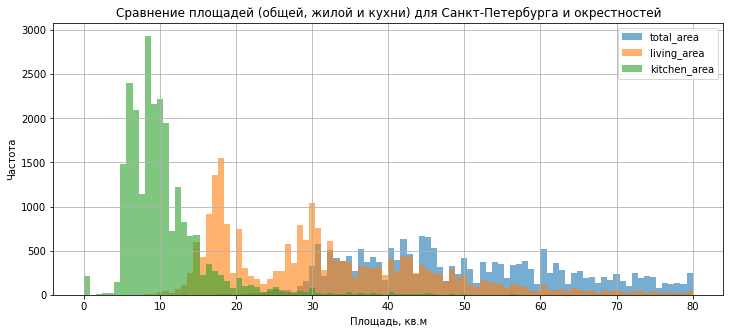

In [33]:
ax = df.plot(kind='hist', y='total_area', range = (0, 80), bins=100, label='total_area',
            alpha=0.6)
df.plot(kind='hist', y='living_area', range = (0, 80), bins=100, label='living_area',
       alpha=0.6, ax=ax)
df.plot(kind='hist', y='kitchen_area', range = (0, 80), bins=100, label='kitchen_area',
       alpha=0.6, ax=ax, grid=True, legend=True, title='areas', figsize=(12,5))
plt.title('Сравнение площадей (общей, жилой и кухни) для Санкт-Петербурга и окрестностей')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Частота');

Данная гистограмма демострирует нам наиболее популярные размеры площадей (общих, жилых и площадей кухонь). Можно заметить ярко выраженные пики в кухонных площадях в районе 6, 8 и 10 метров квадратных. Наиболее популярной жилой площадью оказались 18 и 30 метров квадратных. В категории общих площадей пики не так ярко выражены, однако можно заметить "перевес" в районе 30, 42 и 45 метров квадратных.

Посмотрим, как ведет себя цена в нашей таблице:

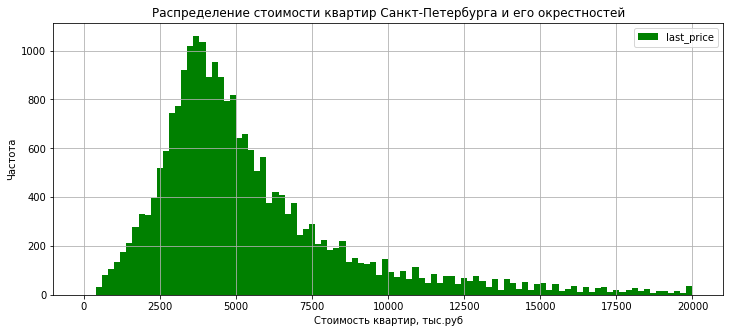

In [34]:
df.plot(kind='hist', y='last_price', range = (0, 20000), bins=100, label='last_price',
            color = 'green', grid=True, legend=True, title='last_price', figsize=(12,5))
plt.title('Распределение стоимости квартир Санкт-Петербурга и его окрестностей')
plt.xlabel('Стоимость квартир, тыс.руб')
plt.ylabel('Частота');

Самая распространённая цена на рынке недвижимости Санкт-Петербурга и окрестностей 3 млн. рублей за квартиру. Посмотрим, каково распределение стоимости квадратного метра:

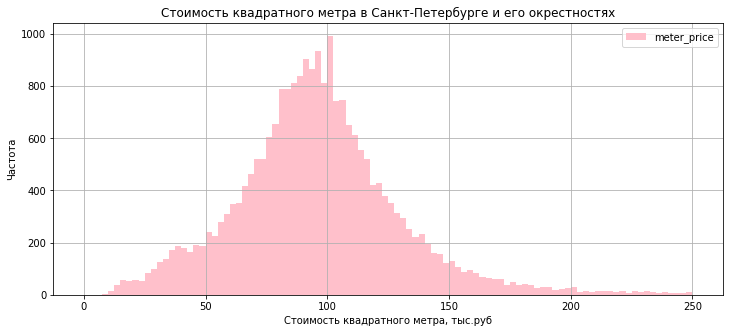

In [35]:
df.plot(kind='hist', y='meter_price', bins=100, range = (0, 250), label='meter_price',
            color='pink', grid=True, legend=True, title='meter_price', figsize=(12,5))
plt.title('Стоимость квадратного метра в Санкт-Петербурге и его окрестностях')
plt.xlabel('Стоимость квадратного метра, тыс.руб')
plt.ylabel('Частота');

Наиболее распространённой стоимостью квадратного метра оказалось 100 тыс. рублей.  
Итак, средняя картина рынка недвижимости Санкт-Петербурга и окрестностей - это квартира стоимостью около 3 млн. рублей и общей площадью около 30 квадратных метров (т.е. около 100 тыс. рублей за метр квадратный).

Посмотрим,  как распределились предложения на рынке недвижимости в зависимости от количества комнат:

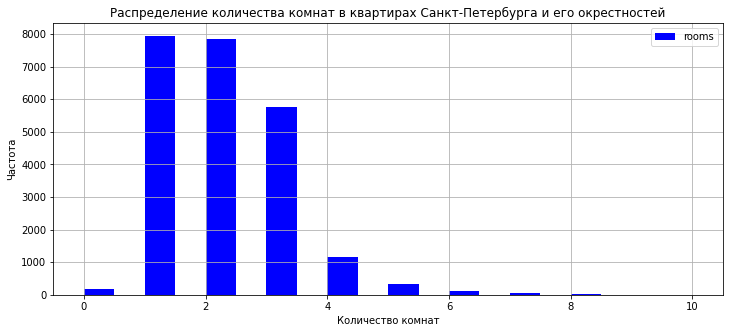

In [36]:
df.plot(kind='hist', y='rooms', bins=20, range = (0, 10), label='rooms',
            color='blue', grid=True, legend=True, title='rooms', figsize=(12,5))
plt.title('Распределение количества комнат в квартирах Санкт-Петербурга и его окрестностей')
plt.xlabel('Количество комнат')
plt.ylabel('Частота');

Гистограмма демонстрирует очень предсказуемый результат: самыми "ходовыми" являются однокомнатные и двухкомнатные квартиры.

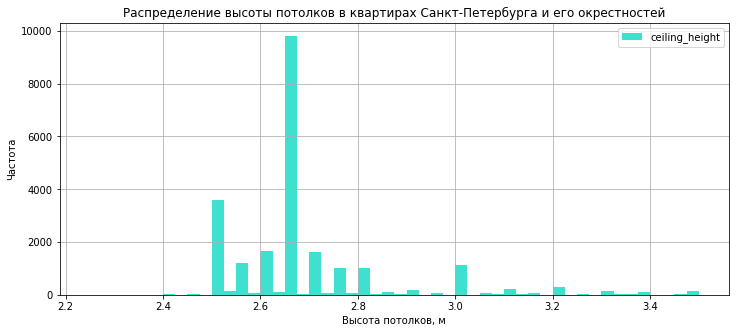

In [37]:
df.plot(kind='hist', y='ceiling_height', bins=50, range = (2.25, 3.5),
        label='ceiling_height',color='turquoise', grid=True,
        legend=True, title='ceiling_height', figsize=(12,5))
plt.title('Распределение высоты потолков в квартирах Санкт-Петербурга и его окрестностей')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота');

Самой популярной высотой потолков являются 2,5 и 2,65 метров.

Изучим время продажи квартиры - количество дней размещения объявления (от публикации до снятия). Построим гистограмму. Посчитаем среднее и медиану.

Среднее количество дней продажи - 181 день
Медианное количество дней продажи - 96 дней


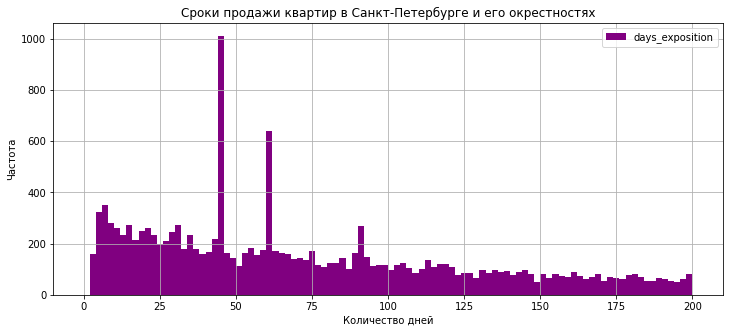

In [38]:
df.plot(kind='hist', y='days_exposition', bins=100, range = (0, 200),
        label='days_exposition',color='purple', grid=True,
        legend=True, title='days_exposition', figsize=(12,5))
plt.title('Сроки продажи квартир в Санкт-Петербурге и его окрестностях')
plt.xlabel('Количество дней')
plt.ylabel('Частота');

mean_days = df['days_exposition'].mean()
print(f'Среднее количество дней продажи - {mean_days:.0f} день')
median_days = df['days_exposition'].median()
print(f'Медианное количество дней продажи - {median_days:.0f} дней')

Медианное значение говорит нам о том, что половина квартир продается в пределах 96 дней. На гистограмме мы видим ярко выраженные пики в районе 45 и 60 дней - это самый распространённый срок продажи. Среднее количество дней продажи значительно выше этих показателей, что обусловлено наличием необычно долгих продаж (максимальный срок продажи квартиры в выборке 1580 дней, что мы видели в самом начале в таблице описательных характеристик). 25% квартир продаётся в пределах 45 дней, что можно считать очень быстрыми продажами, и 25% квартир продаются только после 232 дней - нетипично долгие продажи.  

Однако, мы отбросили большое количество наблюдений, в которых число дней размещения объявления не было заполнено (3181 наблюдение или 13,4% выборки), предположив, что объявление о продаже на момент генерации отчета было всё еще активным. Посчитаем количество дней с даты публикации объявления до максимальной даты в массиве (посчитаем её датой генерации отчета).

In [39]:
# найдем максимальную дату в массиве и переведём её в формат unix-time для удобства последующих расчётов
df['first_day_exposition'].max().timestamp()

1556841600.0

In [40]:
# сформируем срез таблицы, где оставим только строки с незаполненным 'days_exposition'
df_nan_days = df.loc[df['days_exposition'].isna() == True]

def days(row):   # функция для расчета количества дней до момента генерации отчета
    days_max = 1556841600
    days = row['first_day_exposition'].timestamp()
    fill_days = (days_max-days)/86400
    return fill_days
# заполним пропуски расчетным значением количества дней размещения объявления 
df_nan_days['days_exposition'] = df_nan_days[
    'days_exposition'].fillna(df_nan_days.apply(days, axis=1))
df_nan_days.head().T

,0,7,44,45,46
total_images,20,5,13,17,17
last_price,13000,7915,5350,5200,6600
total_area,108.00,71.60,40.00,50.60,52.10
first_day_exposition,2019-03-07 00:00:00,2019-04-18 00:00:00,2018-11-18 00:00:00,2018-12-02 00:00:00,2019-01-31 00:00:00
rooms,3,2,1,2,2
ceiling_height,2.70,2.65,2.65,2.65,2.60
floors_total,16,24,22,9,24
living_area,51.00,40.45,22.60,30.30,29.70
floor,8,22,3,7,9
is_apartment,False,False,False,False,False


Пропуски в срезе данных заполнены, теперь можем посмотреть, как долго "висят" объявления о предположительно непроданных квартирах. Построим гистограмму, рассчитаем среднее и медианное значения:

Среднее количество дней размещения объявления - 218 день
Медианное количество дней размещения объявления - 82 дней


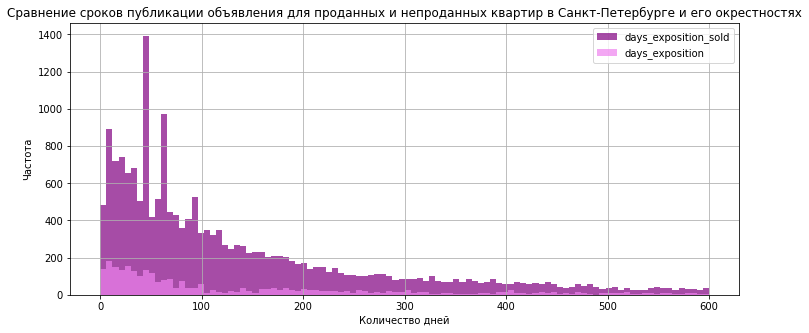

In [41]:
ax = df.plot(kind='hist', y='days_exposition', bins=100, range = (0, 600),
        label='days_exposition_sold',color='purple', grid=True,
        legend=True, title='days_exposition', alpha=0.7);

df_nan_days.plot(kind='hist', y='days_exposition', bins=100, range = (0, 600),
        label='days_exposition',color='violet', grid=True,
        legend=True, title='days_exposition', ax=ax, alpha=0.7, figsize=(12,5))
plt.title('Сравнение сроков публикации объявления для проданных и непроданных квартир в Санкт-Петербурге и его окрестностях')
plt.xlabel('Количество дней')
plt.ylabel('Частота');

mean_days = df_nan_days['days_exposition'].mean()
print(f'Среднее количество дней размещения объявления - {mean_days:.0f} день')
median_days = df_nan_days['days_exposition'].median()
print(f'Медианное количество дней размещения объявления - {median_days:.0f} дней')

Гистограмма демонстрирует нам, что большая часть "незакрытых" объявлений действительно "свежие". Медианное значение здесь у нас сократилось до 82 дней (т.е. половина неснятых объявлений была опубликована в пределах этого временного промежутка). В то же время среднее значение у нас сильно увеличилось, что свидетельствует о присутствии в выборке аномально продолжительных периодах, в течение которых квартиры всё ещё не проданы. Посмотрим максимальный срок:

In [42]:
df_nan_days['days_exposition'].max()

1618.0

Недвижимость остаётся непроданной уже более 4-х лет. Такой долгий срок продажи квартир связан скорее всего с невыгодными условиями, неадекватным соотношением цена-качество или очень непопулярным регионом размещения помещения. Не исключены аномалии и мошенническая деятельность.

Найдём редкие и выбивающиеся значения по следующим параметрам: площадь, цена, число комнат, высота потолков, время продажи. С помощью диаграмм размаха установим самые нетипичные значения исследуемых показателей,"отсечем" их и сформируем срез с "хорошими" данными.

23438

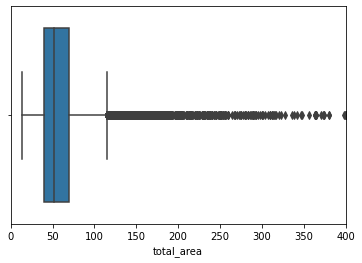

In [43]:
display(len(df))
plt.xlim(0, 400)
sns.boxplot(x='total_area', data=df);

Диаграмма демонстрирует нам, что "выбросы" площадей наблюдаются от 120 метров квадратных. Однако, не стоит торопиться отбрасывать их все, так как это очень большой сегмент от общего количества представленных в объявлениях квартир. По диаграмме рассеяния также видно, что точки "выбросов" начинают "редеть" в площадях от 200 метров квадратных, их и "отсечем". Далее поищем "выбросы" среди значений цены:

23214

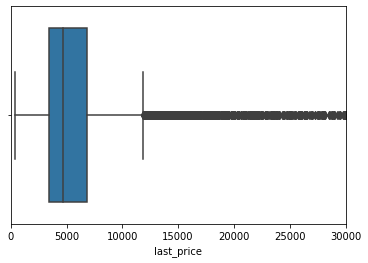

In [44]:
good_df = df.query('total_area <= 200')
display(len(good_df))

plt.xlim(0, 30000)
sns.boxplot(x='last_price', data=df);

Реже других на рынке недвижимости наблюдаются предложения дороже 12,5 млн. рублей. И здесь тоже не стоит торопиться их все убирать. Увеличим порог цены до 20 млн. рублей (в этом месте на диаграмме рассеяния точки "выбросов" начинают "редеть". Устраним и их, посмотрим, какое количество комнат крайне редко встретишь:

22699

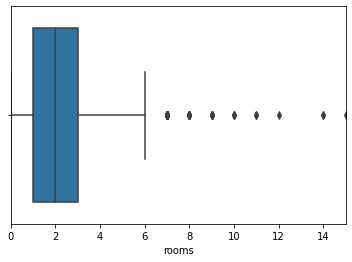

In [45]:
good_df = good_df.query('last_price <= 20000')
display(len(good_df))

plt.xlim(0, 15)
sns.boxplot(x='rooms', data=df);

От одной до трех комнат чаще всего имеют квартиры, представленные в нашем массиве. А вот 6 и более комнат - это уже достаточно редкое явление. "Отсечём" их и найдём нестандартные потолки:

22684

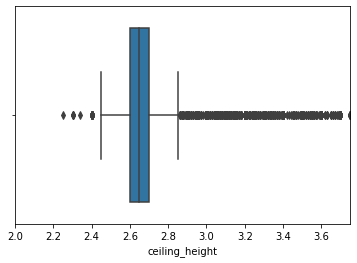

In [46]:
good_df = good_df.query('rooms <= 6')
display(len(good_df))

plt.xlim(2, 3.75)
sns.boxplot(x='ceiling_height', data=df);

Наиболее типичны потолки высотой от 2,4 до 3,2 метров - их и оставим в срезе данных. Повторим наши действия с количеством дней размещения объявления по продаже квартир.

22082

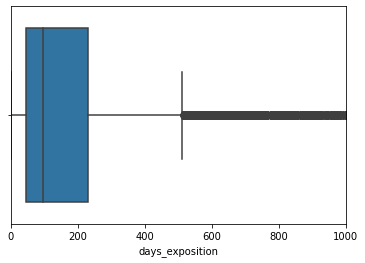

In [47]:
good_df = good_df.query('ceiling_height <= 3.2 and ceiling_height >= 2.4')
display(len(good_df))

plt.xlim(0, 1000)
sns.boxplot(x='days_exposition', data=df);

In [48]:
good_df = good_df.loc[(good_df['days_exposition'].isna() == True) | (good_df['days_exposition'] <= 750)]
len(good_df)

21457

Отбросили записи, где количество дней продажи превышает 750 дней. В полученном срезе осталось 21457 наблюдений. Невостребованными оказались около 9,46% данных первоначального массива. Однако, полученный срез данных больше не содержит нетипичные выбивающиеся значения, поэтому взаимосвязи между параметрами обнаружить будет проще.

Определим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Для удобства оставим в исследуемом срезе только интересующие нас столбцы, а затем расчитаем матрицу корреляции, чтобы установить, какие параметры имеют между собой высокую линейную взаимосвязь.

In [49]:
# напомним себе названия всех столбцов в нашей таблице
good_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'type_of_locality', 'meter_price',
       'year_exposition', 'month_exposition', 'weekday_exposition',
       'floor_category', 'living_ratio', 'kitchen_ratio'],
      dtype='object')

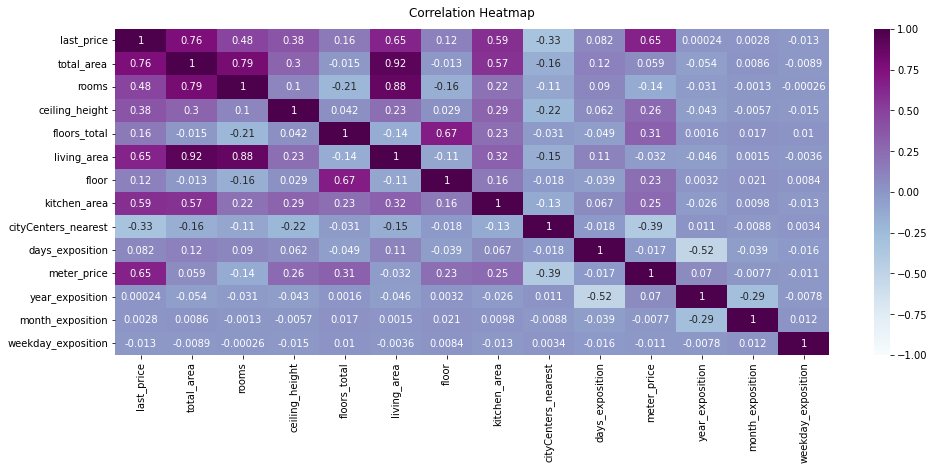

In [50]:
# в списке перечислим только те столбцы, которые нам необходимы для исследования
good_df = good_df[['last_price', 'total_area', 'first_day_exposition', 'rooms',
                   'ceiling_height', 'floors_total', 'living_area', 'floor',
                   'kitchen_area', 'locality_name', 'cityCenters_nearest',
                   'days_exposition', 'meter_price', 'year_exposition',
                   'month_exposition', 'weekday_exposition', 'floor_category']]
# отобразим матрицу корреляции на тепловой карте
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(good_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

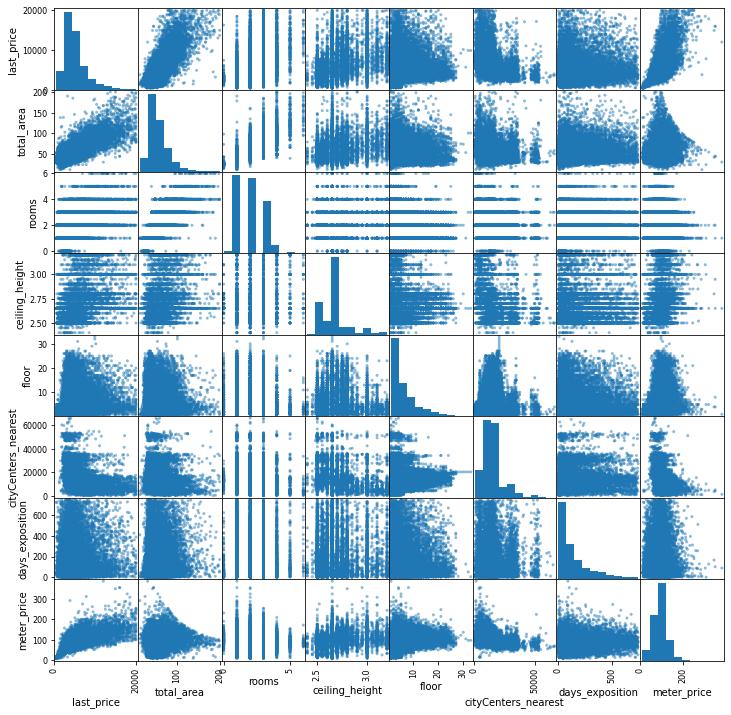

In [51]:
# графически взаимосвязи показателей можно также изобразить с помощью матрицы диаграмм рассеяния
# для большей наглядности ещё раз сузим список показателей, взаимосвязи которых нас интересуют
good_df_corr = good_df[['last_price', 'total_area', 'rooms', 'ceiling_height',
                       'floor', 'cityCenters_nearest', 'days_exposition', 'meter_price']]
pd.plotting.scatter_matrix(good_df_corr, figsize=(12,12), alpha = 0.5);

Таблица корреляции демострирует нам, что больше всего цена квартиры связана с общей площадью помещения. Зависимость от количества комнат есть, но несильная. Что касается удалённости от центра города, то зависимость слабая и обратная, т.е. с уменьшением этого расстояния увеличивается стоимость квадратного метра.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Сформируем сводную таблицу, в которой посчитаем медианное значение стоимости квадратного метра для каждой категории этажа. Результат отобразим в виде столбчатой диаграммы:

,meter_price
floor_category,
другой,97.09
первый,80.42
последний,85.48


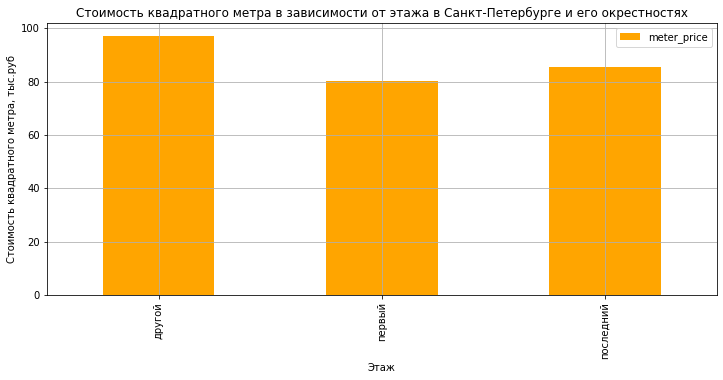

In [52]:
pivot_floor = good_df.pivot_table(
index = 'floor_category',
values = 'meter_price',
aggfunc = 'median')
display(pivot_floor)
good_df.pivot_table(
index = 'floor_category',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), kind='bar', color='orange')

plt.title('Стоимость квадратного метра в зависимости от этажа в Санкт-Петербурге и его окрестностях')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квадратного метра, тыс.руб');

Самый недорогой квадратный метр можно найти на первых этажах, чуть дороже - на последних и самый дорогой на всех остальных этажах. Спрос диктует ценообразование: люди не очень хотят приобретать жильё на первом этаже. Больше шума и возможностей для грабителей. Что касается последнего этажа, то тут тоже есть свои недостатки. От крыши помещение может сильно нагреваться или протекать от дождей.

Также изучим зависимость от даты размещения: дня недели, месяца и года. Проиллюстрируем динамику изменения стимости цены квадратного метра на графиках:

,median,count
,meter_price,meter_price
year_exposition,,
2014,105.157895,49
2015,90.410526,717
2016,90.477390,2356
2017,91.304348,7629
2018,94.754653,8024
2019,102.137112,2682


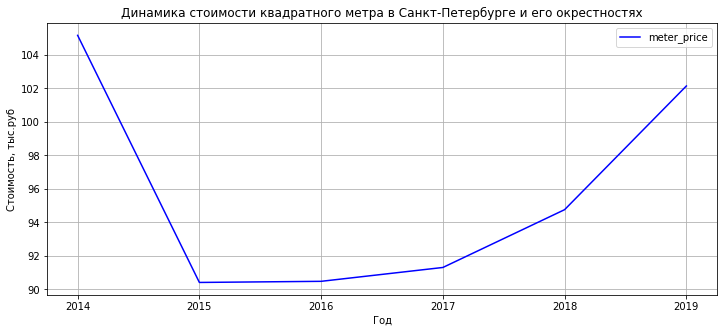

In [53]:
pivot_floor = good_df.pivot_table(
index = 'year_exposition',
values = 'meter_price',
aggfunc = ['median',  'count'])
display(pivot_floor.style.format({'meter_price':'{:.2f}'}))

pivot_floor = good_df.pivot_table(
index = 'year_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), color='blue')
plt.title('Динамика стоимости квадратного метра в Санкт-Петербурге и его окрестностях')
plt.xlabel('Год')
plt.ylabel('Стоимость, тыс.руб')
plt.xticks([2014, 2015, 2016, 2017, 2018, 2019]);

Всё дорожает, и квадратные метры тоже. Стремительный рост стоимости квадратного метра можно наблюдать в период с 2017 по 2019 год. Высокую цену в 2014 году можно объяснить небольшим количеством объявлений о продаже квартир. 49 наблюдений недостаточно для того, чтобы говорить об общих тенденциях.

А как меняется цена в пределах года в зависимости от месяца? Взглянем на график:

,meter_price
month_exposition,
1,94.28
2,93.91
3,94.58
4,95.48
5,91.77
6,90.91
7,93.39
8,95.00
9,94.44


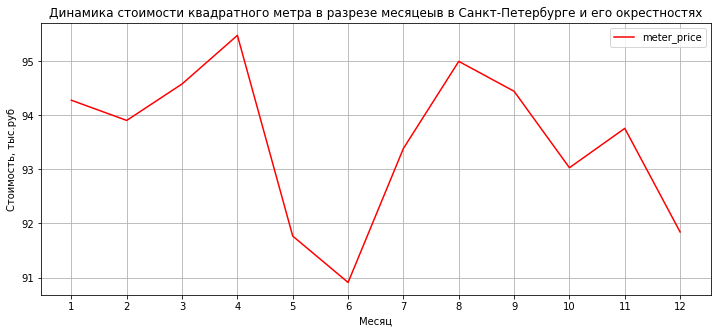

In [54]:
pivot_floor = good_df.pivot_table(
index = 'month_exposition',
values = 'meter_price',
aggfunc = 'median')
display(pivot_floor.style.format({'meter_price':'{:.2f}'}))

pivot_floor = good_df.pivot_table(
index = 'month_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), color='red')
plt.title('Динамика стоимости квадратного метра в разрезе месяцеыв в Санкт-Петербурге и его окрестностях')
plt.xlabel('Месяц')
plt.ylabel('Стоимость, тыс.руб')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);

На протяжении 6 лет (с 2014 по 2019 годы) стоимость квадратного метра падала в мае и июне, а в апреле и августе стремительно вырастала. Проверим также, влияет ли день недели на уровень цен:

,meter_price
weekday_exposition,
0,93.43
1,94.47
2,94.38
3,93.67
4,93.33
5,92.42
6,93.01


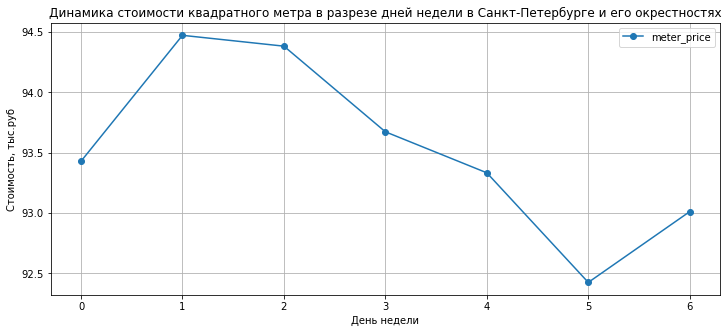

In [55]:
pivot_floor = good_df.pivot_table(
index = 'weekday_exposition',
values = 'meter_price',
aggfunc = 'median')
display(pivot_floor.style.format({'meter_price':'{:.2f}'}))
pivot_floor = good_df.pivot_table(
index = 'weekday_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-')
plt.title('Динамика стоимости квадратного метра в разрезе дней недели в Санкт-Петербурге и его окрестностях')
plt.xlabel('День недели')
plt.ylabel('Стоимость, тыс.руб');

В исследуемом периоде с 2014 по 2019 год больше всего квадратный метр дорожал во вторник и среду, а в субботу и воскресенье цена снижалась.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [56]:
good_df['locality_name'].value_counts().head(10)

Санкт-Петербург    13850
Мурино               561
Кудрово              449
Шушары               429
Всеволожск           374
Пушкин               338
Колпино              329
Парголово            320
Гатчина              288
Выборг               219
Name: locality_name, dtype: int64

Выделим информацию о 10 наиболее представленных в объявлениях населенных пунктах в отдельный датафрейм, на базе которого сформируем сводную таблицу с рассчитанным средним значением квадратного метра в этих местах.

In [57]:
# в списке перечислим только те населённые пункты, которые нам необходимы для исследования
top_places = ['Санкт-Петербург','Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Колпино',
             'Парголово', 'Пушкин', 'Гатчина', 'Выборг']
# сформируем срез данных, обратившись к внешней переменной top_places
top_good_df = good_df.query('locality_name in @top_places')
# посчитаем среднюю стоимость квадратного метра в топ10 населённых пунктов
pivot_top_places = top_good_df.pivot_table(
index = 'locality_name',
values = 'meter_price')
pivot_top_places = pivot_top_places.sort_values(by='meter_price', ascending=False)
pivot_top_places.style.format({'meter_price':'{:.2f}'})

,meter_price
locality_name,
Санкт-Петербург,108.24
Пушкин,101.69
Кудрово,95.38
Парголово,90.19
Мурино,86.06
Шушары,78.41
Колпино,75.34
Гатчина,68.76
Всеволожск,67.10


Сводная таблица демонстрирует нам, что средняя стоимость квадратного метра самая высокая в Санкт-Петербурге, в то время, как в Выборге она почти вдвое меньше.

Выделим квартиры в Санкт-Петербурге и изучим предложения квартир. Посмотрим, сколько наблюдений для исследования у нас осталось:

In [58]:
spb_good_df = good_df[good_df['locality_name'] == 'Санкт-Петербург']
len(spb_good_df)

13850

Для каждой квартиры есть информация о расстоянии до центра. Попытаемся выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график, который покажет, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [59]:
spb_good_df['km_to_citycenter'] = round(spb_good_df['cityCenters_nearest']/1000)
display(spb_good_df.head().T)

,0,2,4,7,9
last_price,13000,5196,10000,7915,5400
total_area,108.00,56.00,100.00,71.60,61.00
first_day_exposition,2019-03-07 00:00:00,2015-08-20 00:00:00,2018-06-19 00:00:00,2019-04-18 00:00:00,2017-02-26 00:00:00
rooms,3,2,2,2,3
ceiling_height,2.70,2.65,3.03,2.65,2.50
floors_total,16,5,14,24,9
living_area,51.00,34.30,32.00,40.45,43.60
floor,8,4,13,22,7
kitchen_area,25.00,8.30,41.00,18.90,6.50
locality_name,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург


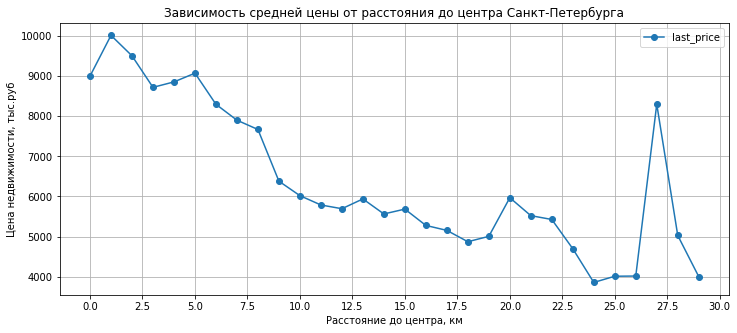

In [60]:
pivot_km_price = spb_good_df.pivot_table(
index = 'km_to_citycenter',
values = 'last_price',
aggfunc = 'mean').plot(grid=True, figsize=(12,5), style='o-')
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена недвижимости, тыс.руб')
plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]);

Как и предполагалось, чем ближе к центру, тем дороже становится жильё. Стремительное снижение стоимости недвижимости значительно "замедляется" в районе 8 км - это и определим как радиус центральной зоны.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Сравним их с аналогичными в выборке "Санкт-Петербург".

In [61]:
spb_center_df = spb_good_df.query('km_to_citycenter <= 8')
len(spb_center_df)

2809

Итак, центр Санкт-Петербурга охватывает 3416 объявлений о продаже недвижимости. Построим в одной системе координат гистограммы для каждого параметра по центру города и по северной столице целиком. Сравним характер очертаний.

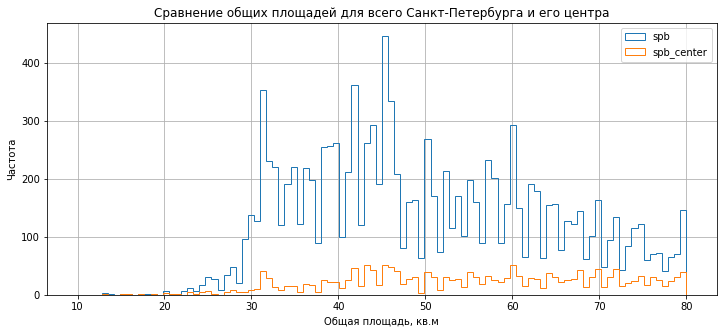

In [62]:
ax = spb_good_df.plot(kind='hist', y='total_area', range = (10, 80), bins=100,
                      label='spb', histtype='step')
spb_center_df.plot(kind='hist', y='total_area', range = (10, 80), bins=100,
                   label='spb_center', histtype='step', ax=ax, grid=True,
                  legend=True, figsize=(12,5))
plt.title('Сравнение общих площадей для всего Санкт-Петербурга и его центра')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота');

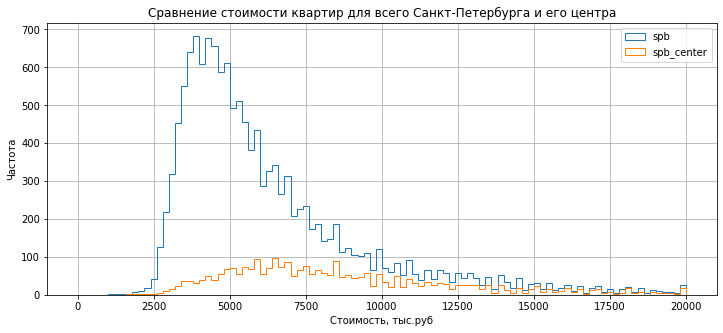

In [63]:
ax = spb_good_df.plot(kind='hist', y='last_price', range = (0, 20000), bins=100,
                      label='spb', histtype='step')
spb_center_df.plot(kind='hist', y='last_price', range = (0, 20000), bins=100,
                   label='spb_center', histtype='step', ax=ax, grid=True,
                  legend=True, figsize=(12,5))
plt.title('Сравнение стоимости квартир для всего Санкт-Петербурга и его центра')
plt.xlabel('Стоимость, тыс.руб')
plt.ylabel('Частота');

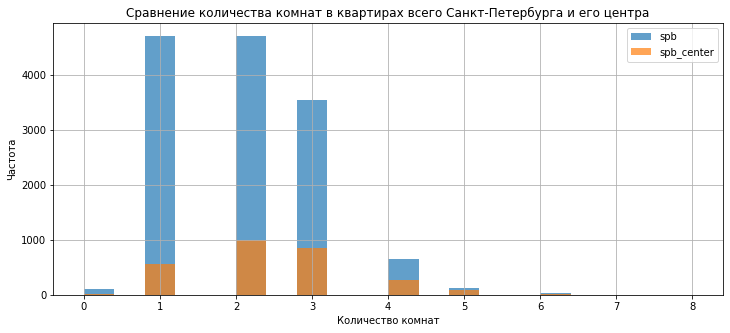

In [64]:
ax = spb_good_df.plot(kind='hist', y='rooms', range = (0, 8), bins=20,
                      label='spb', alpha=0.7)
spb_center_df.plot(kind='hist', y='rooms', range = (0, 8), bins=20,
                   label='spb_center', alpha=0.7, ax=ax, grid=True,
                  legend=True, figsize=(12,5))
plt.title('Сравнение количества комнат в квартирах всего Санкт-Петербурга и его центра')
plt.xlabel('Количество комнат')
plt.ylabel('Частота');

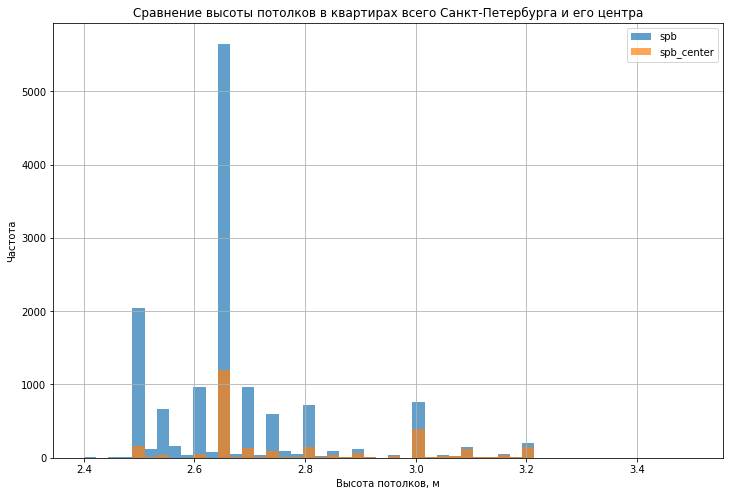

In [65]:
ax = spb_good_df.plot(kind='hist', y='ceiling_height', range = (2.4, 3.5), bins=50,
                      label='spb', alpha=0.7)
spb_center_df.plot(kind='hist', y='ceiling_height', range = (2.4, 3.5), bins=50,
                   label='spb_center', alpha=0.7, ax=ax, grid=True,
                  legend=True, figsize=(12,8))
plt.title('Сравнение высоты потолков в квартирах всего Санкт-Петербурга и его центра')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота');

Мы рассмотрели следующие показатели: площадь, цена, число комнат, высота потолков в квартирах центральной части Санкт-Петербурга и во всём городе. Очертания гистограмм площадей, числа комнат, и высоты потолков в целом схожи, имеют пики и снижения на уровне одних и тех же значений. А вот распределение квартир в разрезе цены различается. В центре города каждый ценовой сегмент представлен небольшим количеством объявлений - таким образом дорогого жилья оказывается намного больше, чем подешевле. Что касается характера поведения цен на жильё в разрезе всего города целиком - здесь количество квартир подешевле сильно преобладает над дорогими предложениями.

Посмотрим как влияет количество комнат на стоимость квартир в Санкт-Петербурге и его центре:

Количество 6-комнатных квартир в центре СПб -  23
Количество 6-комнатных квартир в СПб -  32


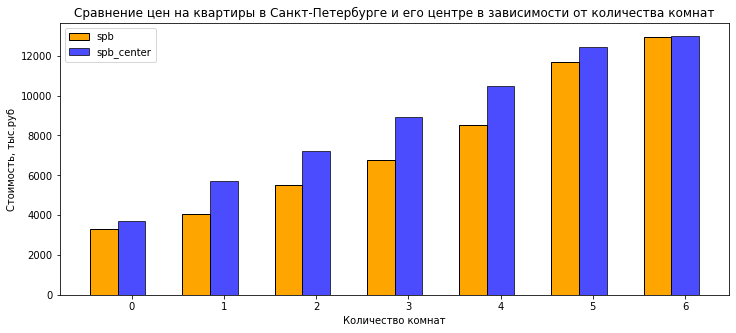

In [66]:
# напишем функцию для отображение характеристик СПб и его центра в одной системе координат
def spb_plot(bars, bara, xtick, name, xlab, ylab):
    fig, ax = plt.subplots()

    barWidth = 0.3

    # расположение по оси х
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]

    # bars для СПб
    plt.bar(r1, bars, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='spb')

    # bara для центра СПб
    plt.bar(r2, bara, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='spb_center', alpha=0.7)

    # настройки графика
    plt.title(name)
    plt.xticks([r + barWidth for r in range(len(bars))], (xtick))
    plt.xlabel(xlab)
    plt.ylabel(ylab);
    plt.legend()
    fig.set_figwidth(12)    
    fig.set_figheight(5)    

    plt.show()
    return

# сравним цены в зависимости от числа комнат
print('Количество 6-комнатных квартир в центре СПб - ', len(spb_center_df[spb_center_df['rooms']==6]))
print('Количество 6-комнатных квартир в СПб - ', len(spb_good_df[spb_good_df['rooms']==6]))

spb_plot(spb_good_df.pivot_table(index = 'rooms', values = 'last_price', 
                                 aggfunc = 'median').reset_index()['last_price'],
         spb_center_df.pivot_table(index = 'rooms', values = 'last_price',
                                   aggfunc = 'median').reset_index()['last_price'],
         spb_good_df.pivot_table(index = 'rooms', values = 'last_price',
                                 aggfunc = 'median').reset_index()['rooms'],
        'Сравнение цен на квартиры в Санкт-Петербурге и его центре в зависимости от количества комнат',
        'Количество комнат', 'Стоимость, тыс.руб')

В центре Санкт-Петербурга квартиры с любым количеством комнат дороже. Самый большой разрыв по цене среди трёх и четырёхкомнатных. Диаграмма демонтрирует практически одинаковую стоимость шестикомнатных квартир, но это объясняется небольшим количеством наблюдений. Большая часть таких квартир приходится как раз на центр Санкт-Петербурга.

Сравним цену квадратного метра в Санкт-Петербурге и его центре в зависимости от этажа:

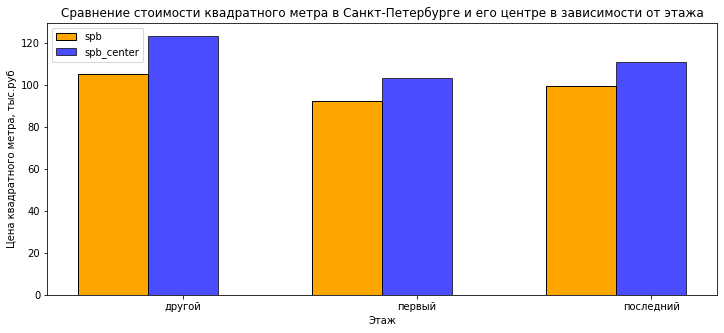

In [67]:
# сравним стоимость квадратного метра в зависимости от категории этажа
spb_plot(spb_good_df.pivot_table(index = 'floor_category', values = 'meter_price', 
                                 aggfunc = 'median').reset_index()['meter_price'],
         spb_center_df.pivot_table(index = 'floor_category', values = 'meter_price',
                                   aggfunc = 'median').reset_index()['meter_price'],
         spb_good_df.pivot_table(index = 'floor_category', values = 'meter_price',
                                 aggfunc = 'median').reset_index()['floor_category'],
        'Сравнение стоимости квадратного метра в Санкт-Петербурге и его центре в зависимости от этажа',
        'Этаж', 'Цена квадратного метра, тыс.руб')

Общая тенденция такая же, как и в выборке по всем городам: самый дешевый квадратный метр на первом этаже, чуть дороже на последнем, и самый дорогой на всех остальных. Но из диаграммы можно заметить, что в центре Санкт-Петербурга стоимость квадратного метра выше, чем во всём городе вне зависимости от этажа.

Сравним динамику стоимости квадратного метра в Санкт-Петербурге и его центре по годам:

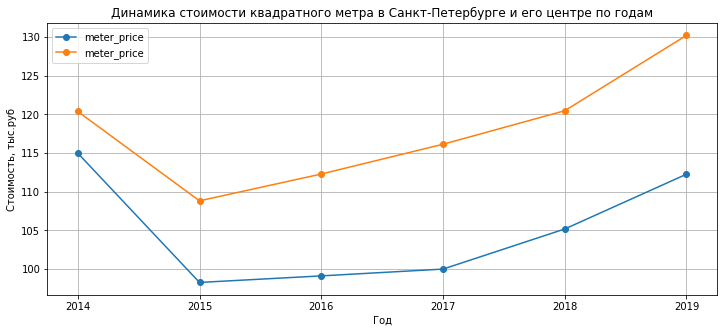

In [68]:
ax = pivot_km_price = spb_good_df.pivot_table(
index = 'year_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-', label='spb')

pivot_km_price = spb_center_df.pivot_table(
index = 'year_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-', ax=ax, label='spb_center')

plt.title('Динамика стоимости квадратного метра в Санкт-Петербурге и его центре по годам')
plt.xlabel('Год')
plt.ylabel('Стоимость, тыс.руб')
plt.xticks([2014, 2015, 2016, 2017, 2018, 2019]);

Нелогично высокую цену в 2014 году снова можно объяснить недостаточностью данных для сравнения. С 2015 по 2019 год заметна тенденция с росту стоимости квадратного метра как во всём Санкт-Петербурге, так и в его центре.

Изучим динамику цены квадратного метра в Санкт-Петербурге и его центре за 6 лет в зависимостиот месяца публикации объявления:

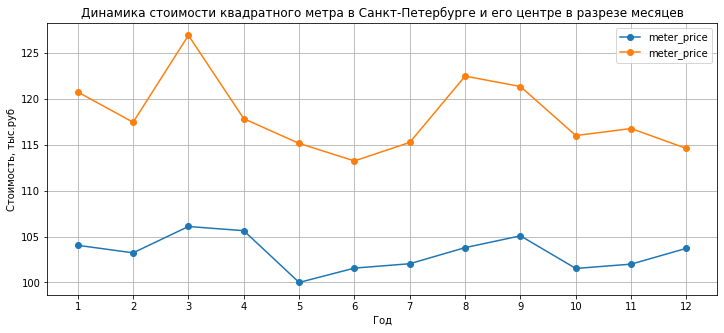

In [69]:
ax = pivot_km_price = spb_good_df.pivot_table(
index = 'month_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-', label='spb')

pivot_km_price = spb_center_df.pivot_table(
index = 'month_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-', ax=ax, label='spb_center')

plt.title('Динамика стоимости квадратного метра в Санкт-Петербурге и его центре в разрезе месяцев')
plt.xlabel('Год')
plt.ylabel('Стоимость, тыс.руб')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);

Можно заметить, что в центре Санкт-Петербурга в течение 6 лет цены за квадратный метр были более неустойчивыми: в марте значительно выше,чем в июне. Во всем городе перепады цены были не такими явными.

Одинако ли влияет день недели публикации объявления на стоимость квадратного метра:

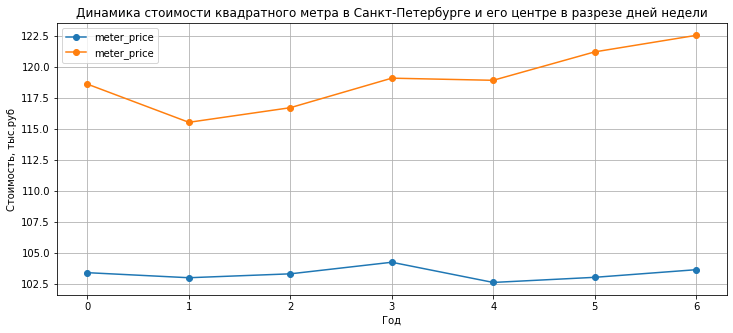

In [70]:
ax = pivot_km_price = spb_good_df.pivot_table(
index = 'weekday_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-', label='spb')

pivot_km_price = spb_center_df.pivot_table(
index = 'weekday_exposition',
values = 'meter_price',
aggfunc = 'median').plot(grid=True, figsize=(12,5), style='o-', ax=ax, label='spb_center')

plt.title('Динамика стоимости квадратного метра в Санкт-Петербурге и его центре в разрезе дней недели')
plt.xlabel('Год')
plt.ylabel('Стоимость, тыс.руб')
plt.xticks([0, 1, 2, 3, 4, 5, 6]);

Снова графики демонстрируют, что более нестабильными цены с 2014 по 2019 годы были в центре Санкт-Петербурга - дороже всего метр квадратный обходился по воскресеньям. В целом по Санкт-Петербургу влияние дня недели было минимальным.  
Однако, все построенные графики демонтрируют главное - стоимость квадратного метра в центре Санкт-Петербурга выше, чем во всём городе.

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) для центра города и Санкт-Петербурга целиком. Изучим тесноту связей между показателями посредством тепловой карты и матрицы корреляции, построим их отдельно для каждой из выборок.

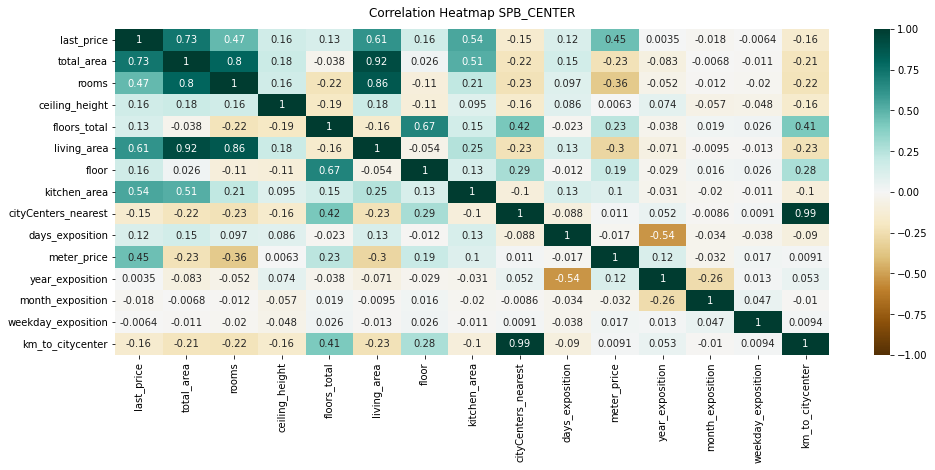

In [71]:
# отобразим матрицу корреляции на тепловой карте
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(spb_center_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap SPB_CENTER', fontdict={'fontsize':12}, pad=12);

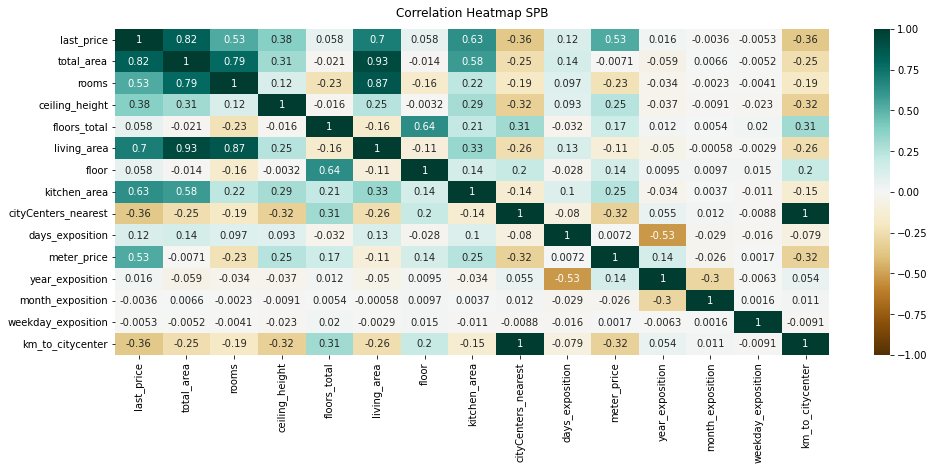

In [72]:
# отобразим матрицу корреляции на тепловой карте
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(spb_good_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap SPB', fontdict={'fontsize':12}, pad=12);

Тепловые карты схожи. В обеих выборках коэффициенты корреляции показывают самую тесную связь между ценой и площадью. В центре Санкт-Петербурга все коэффициенты ниже, чем по всему городу.

### Вывод

В процессе исследования мы изучили рынок недвижимости Санкт-Петербурга и окрестностей. Нашли наиболее типичный "портрет" квартиры - это однушка или двушка, площадью 30-40 метров квадратных с высотой потолков 2.65 метра и стоимостью около 3 млн.рублей. Изучили сроки продаж квартир: половина предложений находит своих покупателей в пределах 95 дней, а четверть остается непроданной даже после 232 дней. Быстрой продажей можно считать срок до 45 дней.  
Установили и отбросили редкие и выбивающиеся значения, которых в массиве было около 9,46%.  
Отследили динамику цен на рынке недвижимости с 2014 по 2019 год. Стремительный рост стоимости квадратного метра можно наблюдать в период с 2017 по 2019 год. Наблюдений по 2014 году оказалось недостаточно для сравнения.  
Определили факторы, больше всего влияющие на стоимость квартир. Таковым оказалась площадь помещения. Зависимость цены и удаленности от центра города обратная: чем больше расстояние до центра, тем ниже цена квартир. В Санкт-Петербурге это ярко выражено: центральная часть города (в радиусе 8 км) по большей части представлена более дорогим ценовым сегментом.  
Вывели топ10 населенных пунктов, охваченных самым большим количеством объявлений о продаже жилья. Стоимость квадратного метра самая высокая наблюдается в Санкт-Петербурге, а самая низкая - в Выборге.

 <a id='anchor_6'></a>
 ## Общий вывод

На этапе изучения данных из файла мы обнаружили, что перед проведением исследования нашу таблицу необходимо привести к более удобному виду: поработать с пропусками, в определённых столбцах заменить тип данных на более функциональный, устранить явные и неявные дубликаты, а также отсечь "выбросы" значений.

На этапе предобработки данных мы избавились от нежелательных пропусков, дубликатов и подозрительных значений, тип данных преобразован в более подходящий, после чего приступили к расчетам дополнительных характеристик, необходимых для получения ответов на поставленные вопросы.

После того, как массив данных был подготовлен, занялись исследовательским анализом. Обнаружили и устранили пропуски там, где это можно было сделать. Проверили данные на выбросы и избавились от них, а также привели данные к сопоставимому виду. Добавили дополнительные расчетные метрики и ввели категориальные переменные.

В процессе исследования мы изучили рынок недвижимости Санкт-Петербурга и окрестностей. Нашли наиболее типичный "портрет" квартиры - это однушка или двушка, площадью 30-40 метров квадратных с высотой потолков 2.65 метра и стоимостью около 3 млн.рублей. Изучили сроки продаж квартир: половина предложений находит своих покупателей в пределах 95 дней, а четверть остается непроданной даже после 232 дней. Быстрой продажей можно считать срок до 45 дней. В дальнейшем можно отдельно изучить активные объявления с продолжительным сроком, чтобы выявить факторы, препятствующие продаже.

Установили и отбросили редкие и выбивающиеся значения, которых в массиве было около 9,46%.  
Отследили динамику цен на рынке недвижимости с 2014 по 2019 год. Стремительный рост стоимости квадратного метра можно наблюдать в период с 2017 по 2019 год, в 2015 и 2016 году цены росли, но медленнее. Наблюдений по 2014 году оказалось недостаточно для сравнения.

Определили факторы, больше всго влияющие на стоимость квартир. Таковым оказалась площадь помещения. Квартиры на первом или последнем этаже дешевле, чем все остальные. Спрос диктует ценообразование: люди не очень хотят приобретать жильё на первом этаже. Больше шума и возможностей для грабителей. Что касается последнего этажа, то тут тоже есть свои недостатки. От крыши помещение может сильно нагреваться или протекать от дождей. Зависимость цены и удаленности от центра города обратная: чем больше расстояние до центра, тем ниже цена квартир. В Санкт-Петербурге это ярко выражено: центральная часть города (в радиусе 8 км) по большей части представлена более дорогим ценовым сегментом. В дальнейшем можно было бы разделить все объявления по цене на две категории: элитное жильё и среднестатистическое. Внутри каждой  группы изучить факторы и характеристики. Зачастую рынок элитного товара имеет совсем иные тенденции, в том числе может складываться так, что чем дороже, тем лучше покупается/продаётся. Приобретая дорогую недвижимость, люди подтверждают и демонстрируют свой статус.

Мы рассмотрели следующие показатели: площадь, цена, число комнат, высота потолков - в квартирах центральной части Санкт-Петербурга и во всём городе. Очертания гистограмм площадей, числа комнат, и высоты потолков в целом схожи, имеют пики и снижения на уровне одних и тех же значений. А вот распределение квартир в разрезе цены различается. В центре города каждый ценовой сегмент представлен небольшим количеством объявлений - таким образом дорогого жилья оказывается намного больше, чем подешевле. Что касается характера поведения цен на жильё в разрезе всего города целиком - здесь количество квартир подешевле сильно преобладает над дорогими предложениями. Сравнили стоимость квадратного метра в Санкт-Петербурге и его центре в зависимости от этажа (первый, последний, другой) - вывод такой же, как и по всем городам, первый и последний этаж дешевле. Изучили зависимость стоимости квартир от количества комнат в Санкт-Петербурге и его центре. В центре Санкт-Петербурга квартиры с любым количеством комнат дороже. Самый большой разрыв по цене среди трёх и четырёхкомнатных. Диаграмма демонтрирует практически одинаковую стоимость шестикомнатных квартир, но это объясняется небольшим количеством наблюдений. Большая часть таких квартир приходится как раз на центр Санкт-Петербурга. Провели сравнение стоимости квадратного метра по Санкт-Петербургу и его центру в зависимости от года, месяца или дня недели публикации объявления. Динамика в разрезе лет такая же, как и в первой части исследования - рост. Что касается месяца и дня недели, то влияние этих факторов неодназначно. В центре города в течение 6 лет наблюдались пики продаж в марте, а в июне снижения. По всему городу изменение цен не так подвижно. День недели на цене квартир во всем Санкт-Петербурге практически не сказывался, а в центре города - цена росла в воскресенье.
   
Вывели топ10 населенных пунктов, охваченных самым большим количеством объявлений о продаже жилья. Стоимость квадратного метра самая высокая наблюдается в Санкт-Петербурге, а самая низкая - в Выборге.

В текущем исследовании ряд факторов, известных по объявлениям, мы отбросили. Их также можно изучить. Например, влияет ли на цену или скорость продажи близость квартиры к паркам/водоёмам/аэропорту. Каков уровень спроса на квартиры-студии или квартиры со свободной планировкой? Дешевле/дороже ли они в сравнении со всеми остальными? Дополнительно можно провести исследование для разных городов и сравнить результаты.